<a href="https://colab.research.google.com/github/nazgulseralina/Experiment/blob/main/k_means%20and%20logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [5]:
X = df.iloc[:,:-1]
y = df['Class']

X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=500)

In [6]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=2)

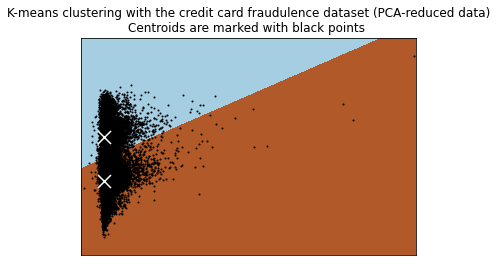

In [8]:
# Step size of the mesh. Improve quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering with the credit card fraudulence dataset (PCA-reduced data)\n'
          'Centroids are marked with black points ')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [9]:
predictions = kmeans.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False adverse amount (with consideration of failures ): ", false_neg_rate)
print("False adverse amount (with consideration to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Overal test data marks:", len(X_test))

Accuracy: 0.45334993137348784
False adverse amount (with consideration of failures ):  0.0010510335162910195
False adverse amount (with consideration to all the data):  0.0005745475438092502
False negatives, false positives, mispredictions: 54 51324 51378
Overal test data marks: 93987


Credit Card Fraud - Logistic Regression.

Our aim is to decrease the False Negative Rate (FNR).

In order to improve dataset characterictics we can execute next steps:

1) Include some noise (gaussian) to the fraudulence data to reduce the shortcoming 
2) Chose accidental case of the fraud data and train k models and to calculate average of them.


In [10]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas-ml
import pandas_ml as pdml
from pandas_ml import ConfusionMatrix
!pip install pandas-ml
import pandas_ml


from sklearn.preprocessing import scale
import random
!pip install imblearn
!pip install --upgrade sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 9.5 MB/s eta 0:00:00


AttributeError: ignored

In [11]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38385.0,1.404811,-1.500500,-0.962441,-2.452041,0.740082,3.373825,-1.548089,0.798738,-1.892230,...,-0.373309,-1.051264,0.073156,0.951332,0.264327,-0.403418,0.030905,0.036997,92.40,0
1,153153.0,2.020741,-0.857180,-0.313018,-0.280321,-1.118233,-0.579558,-0.767771,-0.128659,0.246774,...,-0.498348,-0.836410,0.393938,-0.164071,-0.458150,-0.937161,0.086829,-0.015515,43.06,0
2,66048.0,1.054014,-0.364397,1.173794,0.917688,-1.150970,-0.282665,-0.530352,0.049696,0.910345,...,-0.050921,-0.097723,-0.028815,0.421582,0.233372,0.309952,0.005057,0.038852,74.99,0
3,70309.0,-2.271322,-1.951893,1.166490,3.429579,1.646530,-0.624564,0.052932,0.132985,-1.359867,...,0.342660,-0.274644,1.028054,-0.523825,-0.112926,0.131340,-0.046293,0.211737,328.94,0
4,148550.0,-0.524437,0.853077,-0.125521,-0.388987,0.403824,-0.849705,0.871788,-0.231757,0.106621,...,-0.014752,0.038346,0.290318,0.075459,-1.432781,0.075068,-0.103661,0.395084,11.51,0


In [13]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We define", len(frauds), "fraudulent data marks and", len(non_frauds), "nonfraudulent data marks.")

We define 492 fraudulent data marks and 284315 nonfraudulent data marks.


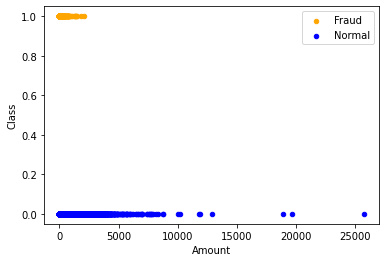

These characteristics defined in total distribution. 


In [16]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("These characteristics defined in total distribution. ")

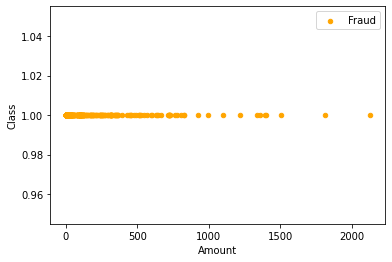

In [17]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

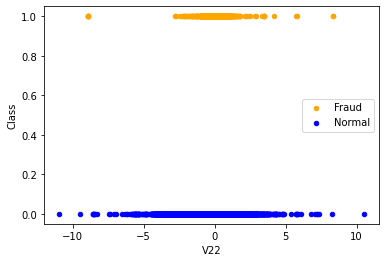

This characteristics is less meaningful in total distribution.


In [18]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This characteristics is less meaningful in total distribution.")

Logistic Regression (vanilla)

In [25]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [26]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, accordingly:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test amounts, accordingly:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Overal statistics of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("The statistics of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("The statistics of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, accordingly: 284807 284807
Train and test amounts, accordingly: 185124 185124 | 99683 99683
Overal statistics of frauds: 492 0.001727485630620034
The statistics of frauds on y_test: 154 0.0015448973245187243
The statistics of frauds on y_train: 338 0.0018258032453922777


In [27]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9992074877361236


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
